In [ ]:
import numpy as np
from tensorflow.keras import datasets
import requests
import pandas as pd


In [ ]:
all_urls = ['719',
            '566',
            "714",
            "690",
            "686",
            '599',
            '667',
            '666',
            '665',
            '580',
            '576',
            '532',
            '525',
            '515',
            '513',
            '511',
            '506',
            '512']

sub_files = []
met_files = []
for url in all_urls:
  all_response = requests.get(f'https://osdr.nasa.gov/osdr/data/osd/files/{url}')
  all_response.raise_for_status()
  all_data = all_response.json()
  sub_files.append(all_data['studies'][f"OSD-{url}"]["study_files"])
  met_files.append(all_data['studies'][f"OSD-{url}"]["study_files"])



# Flatten
flat_sub_files = [item for sublist in sub_files for item in sublist]
flat_met_files = [item for sublist in met_files for item in sublist]

#filtered output
filtered_files = [
    {
        "subcategory": f["subcategory"],
        "remote_url": f["remote_url"]
    }
    for f in flat_sub_files
    if isinstance(f, dict) and f.get("subcategory") == "Normalized Counts Data"

]

filtered_met_files = [
    {
        "category": f["category"],
        "remote_url": f["remote_url"]
    }
    for f in flat_met_files
    if isinstance(f, dict) and f.get("category") == "Study Metadata Files"

]

#print(filtered_files)

In [ ]:
filtered_met_files

[{'category': 'Study Metadata Files',
  'remote_url': '/geode-py/ws/studies/OSD-719/download?source=datamanager&file=OSD-719_metadata_OSD-719-ISA.zip'},
 {'category': 'Study Metadata Files',
  'remote_url': '/geode-py/ws/studies/OSD-566/download?source=datamanager&file=OSD-566_metadata_OSD-566-ISA.zip'},
 {'category': 'Study Metadata Files',
  'remote_url': '/geode-py/ws/studies/OSD-714/download?source=datamanager&file=OSD-714_metadata_OSD-714-ISA.zip'},
 {'category': 'Study Metadata Files',
  'remote_url': '/geode-py/ws/studies/OSD-690/download?source=datamanager&file=OSD-690_metadata_OSD-690-ISA.zip'},
 {'category': 'Study Metadata Files',
  'remote_url': '/geode-py/ws/studies/OSD-686/download?source=datamanager&file=OSD-686_metadata_OSD-686-ISA.zip'},
 {'category': 'Study Metadata Files',
  'remote_url': '/geode-py/ws/studies/OSD-599/download?source=datamanager&file=OSD-599_metadata_OSD-599-ISA.zip'},
 {'category': 'Study Metadata Files',
  'remote_url': '/geode-py/ws/studies/OSD-66

In [ ]:
#main data
df_list = []

for i in filtered_files:
  #print(i['remote_url'])
  df = pd.read_csv(f"https://osdr.nasa.gov/{i['remote_url']}", index_col = 0)
  df.index =  df.index.str.split('.').str[0]
  if df.shape[0] < 35000:
  #for each imported file, correct the gene names
    df_list.append(df)


merged_df = pd.concat(df_list, axis = 1)

print(merged_df.shape)


(37368, 857)


In [ ]:
df.index

Index(['ENSMUSG00000000001', 'ENSMUSG00000000028', 'ENSMUSG00000000031',
       'ENSMUSG00000000037', 'ENSMUSG00000000049', 'ENSMUSG00000000056',
       'ENSMUSG00000000058', 'ENSMUSG00000000078', 'ENSMUSG00000000085',
       'ENSMUSG00000000088',
       ...
       'ENSMUSG00002076852', 'ENSMUSG00002076874', 'ENSMUSG00002076896',
       'ENSMUSG00002076907', 'ENSMUSG00002076937', 'ENSMUSG00002076954',
       'ENSMUSG00002076957', 'ENSMUSG00002076967', 'ENSMUSG00002076971',
       'ENSMUSG00002076983'],
      dtype='object', length=31394)

In [ ]:
#meta data
"""
df_meta_list = []

for i in filtered_met_files:
  #print(i['remote_url'])
  df = pd.read_csv(f"https://osdr.nasa.gov/{i['remote_url']}", index_col = 0)
  df_meta_list.append(df)


meta_df = pd.concat(df_meta_list, axis = 1)

print(meta_df.shape)
"""

'\ndf_meta_list = []\n\nfor i in filtered_met_files:\n  #print(i[\'remote_url\'])\n  df = pd.read_csv(f"https://osdr.nasa.gov/{i[\'remote_url\']}", index_col = 0)\n  df_meta_list.append(df)\n\n\nmeta_df = pd.concat(df_meta_list, axis = 1)\n\nprint(meta_df.shape)\n'

In [ ]:
merged_df.sample(10)

,10,11,12,15,16,17,18,19,20,22,...,RR23_SPL_GC_G7,RR23_SPL_GC_G8,RR23_SPL_GC_G9,RR23_SPL_VIV_V2,RR23_SPL_VIV_V3,RR23_SPL_VIV_V4,RR23_SPL_VIV_V5,RR23_SPL_VIV_V6,RR23_SPL_VIV_V7,RR23_SPL_VIV_V8
ENSMUSG00000064213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000025647,2177.831579,2565.920748,1894.137169,939.892852,3430.283782,2229.629429,2433.972206,2147.264266,1900.017689,1683.864441,...,12877.032259,20544.993332,21105.631074,13921.502072,11781.912673,15396.234301,21933.842860,17977.812185,9411.665563,18318.422001
ENSMUSG00000030956,811.552694,668.306510,182.101120,288.924548,337.856558,571.228594,314.925798,327.674868,507.836723,372.595479,...,1656.572513,1614.000709,1592.053301,2078.763259,2079.134996,2853.178114,3389.563555,1955.870858,3804.670910,2079.198994
ENSMUSG00000118032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000082587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,51.659870,0.000000,6.122423,0.000000,0.000000,22.776257,0.000000
ENSMUSG00000021797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000121109,1.110852,0.000000,1.261629,1.058883,1.099896,0.000000,3.378032,0.000000,0.957695,0.000000,...,68.549378,58.060142,43.368457,30.525770,60.060599,51.686467,41.593390,63.892821,91.379979,57.394666
ENSMUSG00000114078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,24.790743,0.000000,8.164917,0.000000,0.000000,11.384516,0.000000
ENSMUSG00000038005,90.495981,90.940748,86.222249,82.711188,81.628722,107.119803,56.613918,67.374482,89.656152,63.651152,...,441.906821,470.369706,504.073695,672.657454,484.763776,936.324517,998.980777,519.401361,1006.747620,584.582793
ENSMUSG00000083169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='Count'>

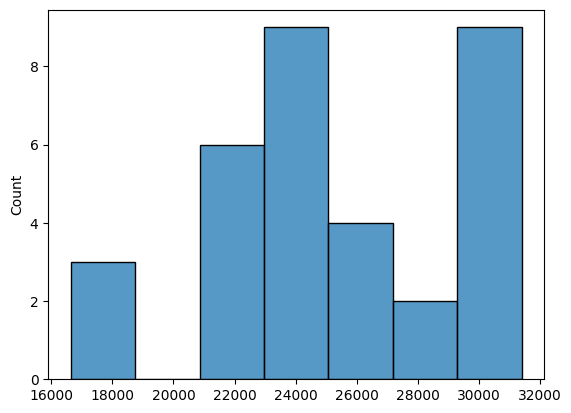

In [ ]:
rowLenght = []
for i in df_list:
  rowLenght.append(i.shape[0])

import seaborn as sns
sns.histplot(rowLenght)

In [ ]:
'RR23_ADR_VIV_V1' in list(merged_df.columns)

False

In [ ]:
merged_df = merged_df.dropna()

### Importing metadata

In [ ]:
merged_df.shape

(12791, 857)

In [ ]:
# import our own available metadata
file_id = "1sssRVjOPKIcdSjppbDaH1gvl63fDGJKm"
url = f"https://drive.google.com/uc?id={file_id}"

meta_df = pd.read_excel(url)

In [ ]:
meta_df.head()

,Study Name,Sample Name,Characteristics [Organism],Characteristics [Material Type],Factor Value [Sex],Factor Value [Ionizing Radiation]
0,OSD-719-10,10,Mus musculus,Blood,FeMale,mixed radiation field
1,OSD-719-11,11,Mus musculus,Blood,FeMale,mixed radiation field
2,OSD-719-12,12,Mus musculus,Blood,FeMale,mixed radiation field
3,OSD-719-15,15,Mus musculus,Blood,Male,mixed radiation field
4,OSD-719-16,16,Mus musculus,Blood,Male,mixed radiation field


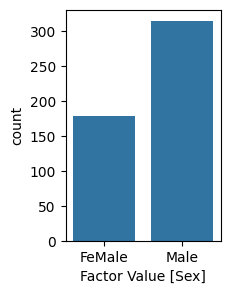

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [2, 3]

sns.countplot(x='Factor Value [Sex]', data=meta_df)
plt.savefig('factor_value_sex.png')

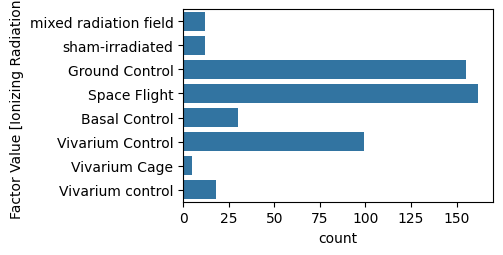

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 2.5]

sns.countplot(y='Factor Value [Ionizing Radiation]', data=meta_df)
plt.savefig('factor_value_sex.png')

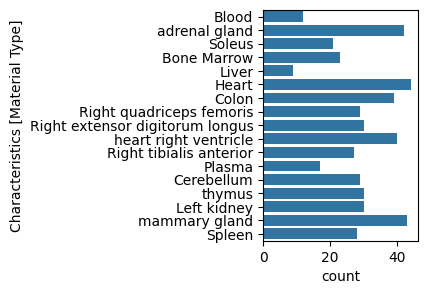

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [2, 3]

sns.countplot(y='Characteristics [Material Type]', data=meta_df)
plt.savefig('factor_value_sex.png')

In [ ]:
#can I possibly use all the datasets with the original metadata from OSDR
#all_data
#for starters, no

In [ ]:

study_names_from_meta = list(meta_df['Sample Name'])
study_names_from_meta = [str(col) for col in study_names_from_meta if col in study_names_from_meta]

matching_columns = [col for col in study_names_from_meta if col in merged_df.columns]
merged_df_meta = merged_df[matching_columns]


In [ ]:
merged_df_meta.shape

(12791, 856)

In [ ]:
merged_df_meta.head()
#caution: some columns appear twice. not sure why

,10,11,12,15,16,17,18,19,20,22,...,RR23_SPL_VIV_V6,RR23_SPL_VIV_V6,RR23_SPL_VIV_V7,RR23_SPL_VIV_V7,RR23_SPL_VIV_V7,RR23_SPL_VIV_V7,RR23_SPL_VIV_V8,RR23_SPL_VIV_V8,RR23_SPL_VIV_V8,RR23_SPL_VIV_V8
ENSMUSG00000000001,284.884393,338.195277,244.161085,218.218097,323.716341,290.348767,254.989961,212.801261,265.740091,252.285853,...,2257.898942,2257.873246,11.342836,11.341684,2563.882804,2563.858596,11.284376,11.283178,2460.742641,2460.719389
ENSMUSG00000000028,32.185165,20.135381,8.859870,14.648170,12.860979,14.959408,9.045522,14.383836,8.694140,16.522975,...,212.257094,212.254679,9.292091,9.287448,593.754245,593.748638,8.055484,8.044904,233.502186,233.499980
ENSMUSG00000000031,0.000000,0.000000,2.085535,0.000000,4.425464,9.598956,0.000000,0.000000,0.000000,0.000000,...,21.529427,21.529182,5.241584,5.185892,11.695862,11.695752,5.311800,5.257998,13.228438,13.228313
ENSMUSG00000000056,705.434842,308.504010,269.403054,265.093274,259.568201,286.460954,278.104170,316.991216,271.790303,358.992107,...,980.282726,980.271570,11.541932,11.540927,2948.225750,2948.197913,10.395490,10.393295,1313.573158,1313.560745
ENSMUSG00000000058,6.664053,2.526160,5.481493,2.160671,1.461516,14.494960,5.863791,2.449978,2.563016,3.684325,...,593.901965,593.895206,9.398727,9.394407,641.814730,641.808670,8.782018,8.775478,407.246142,407.242294


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df_meta)

pca = PCA()
pca.fit(scaled_data)

principal_components = pca.transform(scaled_data)

pca_df = pd.DataFrame(data = principal_components,
                      columns = [f'principal_component_{i+1}' for i in range(principal_components.shape[1])])



<Axes: >

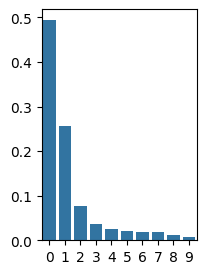

In [ ]:
sns.barplot(pca.explained_variance_ratio_[range(0,10)])

In [ ]:
pca_df.head()

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8,principal_component_9,principal_component_10,...,principal_component_847,principal_component_848,principal_component_849,principal_component_850,principal_component_851,principal_component_852,principal_component_853,principal_component_854,principal_component_855,principal_component_856
0,4.148518,14.229091,-0.951641,5.055170,0.778916,-1.029311,3.084169,-3.417922,0.487137,1.529986,...,1.254916e-12,-1.410959e-13,-6.343035e-13,4.386918e-11,2.213357e-13,8.881639e-13,-3.017703e-13,-1.740304e-12,9.286777e-13,-7.551654e-13
1,-4.752984,-12.248401,-0.233789,2.652376,0.122287,-0.110175,-2.194751,2.191690,-0.231989,5.392786,...,-1.788722e-13,1.046689e-12,6.862774e-14,7.594604e-11,-1.937066e-12,2.677705e-12,-3.184626e-12,1.598237e-12,2.580770e-12,-2.358130e-12
2,1.769219,4.491488,3.358016,-22.807260,-2.138458,3.423832,-13.788235,11.508484,-2.390058,3.439700,...,-5.232343e-12,-9.336485e-13,9.093065e-12,-2.403564e-10,2.339069e-11,-5.481372e-12,-1.092764e-11,-2.159401e-11,-5.856820e-12,-1.189576e-11
3,4.790537,16.574745,0.686988,-5.015533,0.616811,1.181622,-2.557490,1.271942,-0.347704,2.087791,...,4.633288e-12,1.895715e-12,8.123193e-12,-2.081919e-11,-3.503776e-13,-2.620121e-12,-8.877692e-13,-1.561498e-12,-1.774038e-12,2.341304e-12
4,2.330497,9.435944,0.529391,-4.727363,-0.126150,-0.292358,2.086955,-3.128543,-0.276295,0.329733,...,9.182970e-13,-1.512725e-13,2.369090e-12,-1.681852e-11,-3.877251e-13,-1.144811e-12,3.682769e-12,2.643805e-12,-2.678077e-13,7.217897e-12


In [ ]:
focMeta = pd.DataFrame(merged_df_meta.columns.astype(str), columns = ['Sample Name'])

focMeta = pd.merge(focMeta, meta_df.astype(str), on = 'Sample Name', how = 'left')

focMeta.shape

(856, 6)

In [ ]:
focMeta

,Sample Name,Study Name,Characteristics [Organism],Characteristics [Material Type],Factor Value [Sex],Factor Value [Ionizing Radiation]
0,10,OSD-719-10,Mus musculus,Blood,FeMale,mixed radiation field
1,11,OSD-719-11,Mus musculus,Blood,FeMale,mixed radiation field
2,12,OSD-719-12,Mus musculus,Blood,FeMale,mixed radiation field
3,15,OSD-719-15,Mus musculus,Blood,Male,mixed radiation field
4,16,OSD-719-16,Mus musculus,Blood,Male,mixed radiation field
...,...,...,...,...,...,...
851,RR23_SPL_VIV_V7,OSD-506-RR23_SPL_VIV_V7,Mus musculus,Spleen,Male,Vivarium Control
852,RR23_SPL_VIV_V8,OSD-506-RR23_SPL_VIV_V8,Mus musculus,Spleen,Male,Vivarium Control
853,RR23_SPL_VIV_V8,OSD-506-RR23_SPL_VIV_V8,Mus musculus,Spleen,Male,Vivarium Control
854,RR23_SPL_VIV_V8,OSD-506-RR23_SPL_VIV_V8,Mus musculus,Spleen,Male,Vivarium Control


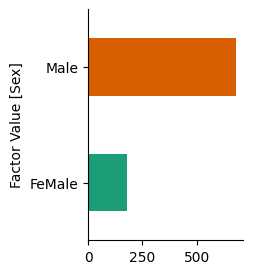

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
focMeta.groupby('Factor Value [Sex]').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

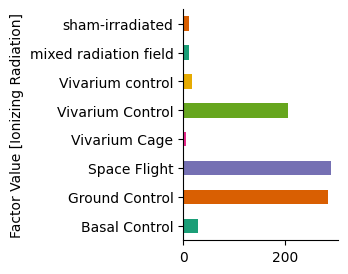

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
focMeta.groupby('Factor Value [Ionizing Radiation]').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(focMeta.isna().sum())

Sample Name                          0
Study Name                           0
Characteristics [Organism]           0
Characteristics [Material Type]      0
Factor Value [Sex]                   0
Factor Value [Ionizing Radiation]    0
dtype: int64


In [ ]:
pca_df['treatment'] = focMeta['Factor Value [Ionizing Radiation]']
pca_df['organ'] = focMeta['Characteristics [Material Type]']
pca_df['sex'] = focMeta['Factor Value [Sex]']

pca_df.shape

(12791, 859)

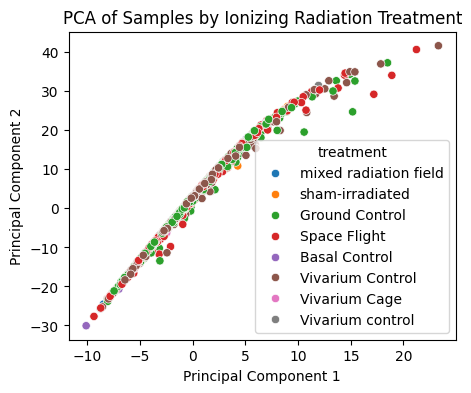

In [ ]:
# prompt: using pca_df, plot principal componnet 1 againast pincipla component 2 and color by factor value ionizing radiation

import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
sns.scatterplot(data=pca_df, x='principal_component_1', y='principal_component_2', hue='treatment')
plt.title('PCA of Samples by Ionizing Radiation Treatment')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

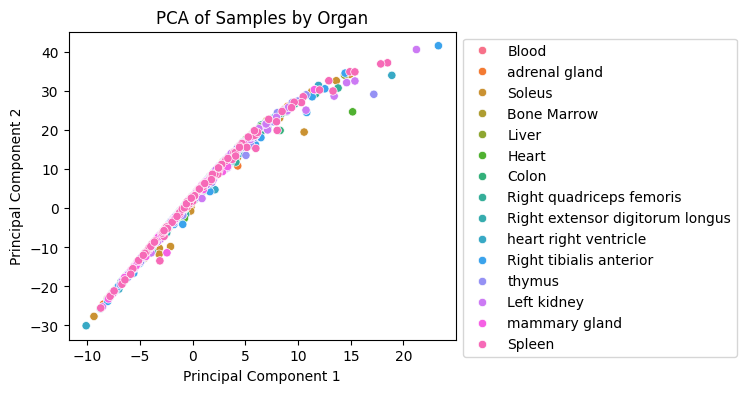

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
sns.scatterplot(data=pca_df, x='principal_component_1', y='principal_component_2', hue='organ')
plt.title('PCA of Samples by Organ')
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

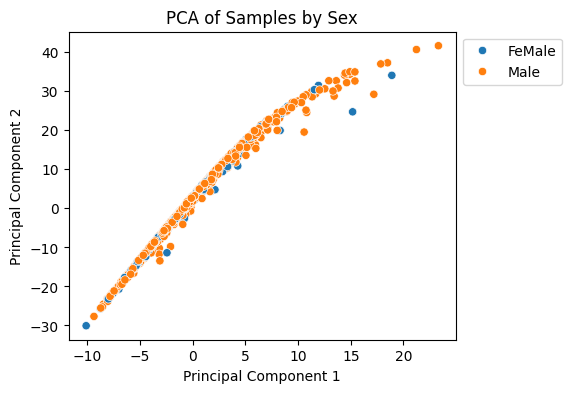

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
sns.scatterplot(data=pca_df, x='principal_component_1', y='principal_component_2', hue='sex')
plt.title('PCA of Samples by Sex')
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

None of the three could map effectively well to the principal components

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install umap-learn
import umap
reducer = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, spread=1.0, metric='euclidean')
umap_embedding = reducer.fit_transform(scaled_data.T)

umap_df = pd.DataFrame(data = umap_embedding,
                       columns = ['UMAP_1', 'UMAP_2'])

umap_df['treatment'] = focMeta['Factor Value [Ionizing Radiation]']
umap_df['organ'] = focMeta['Characteristics [Material Type]']
umap_df['sex'] = focMeta['Factor Value [Sex]']


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


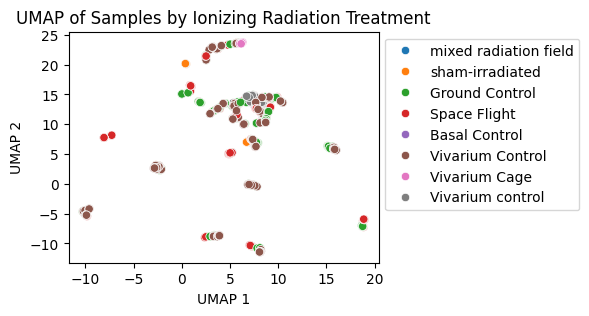

In [ ]:

plt.figure(figsize=(4,3))
sns.scatterplot(data=umap_df, x='UMAP_1', y='UMAP_2', hue='treatment')
plt.title('UMAP of Samples by Ionizing Radiation Treatment')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.show()


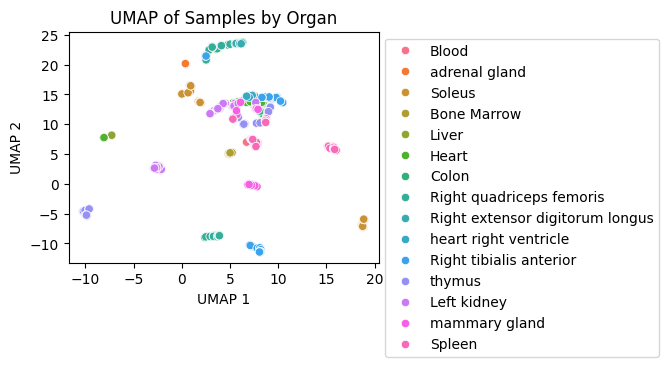

In [ ]:

plt.figure(figsize=(4,3))
sns.scatterplot(data=umap_df, x='UMAP_1', y='UMAP_2', hue='organ')
plt.title('UMAP of Samples by Organ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.show()

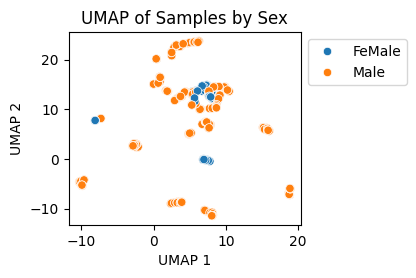

In [ ]:
plt.figure(figsize=(3,2.5))
sns.scatterplot(data=umap_df, x='UMAP_1', y='UMAP_2', hue='sex')
plt.title('UMAP of Samples by Sex')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.show()

UMAP could decompose the gender and organ but not treatment. Justification for trying the DL model- CVAE

In [ ]:
import keras
import tensorflow as tf
import numpy as np

from keras import layers
from keras import ops
import matplotlib.pyplot as plt
import os
import gdown
from zipfile import ZipFile

from tensorflow.keras import (
    layers,
    models,
    callbacks,
    utils,
    metrics,
    losses,
    optimizers,
)

from keras.losses import mean_squared_error as mse_loss

In [ ]:
#transpose data and preserver names
merged_df_meta_Trans = merged_df_meta.T
merged_df_meta_Trans.head()

,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,ENSMUSG00000000088,ENSMUSG00000000120,ENSMUSG00000000127,...,ENSMUSG00000121225,ENSMUSG00000121238,ENSMUSG00000121247,ENSMUSG00000121251,ENSMUSG00000121252,ENSMUSG00000121258,ENSMUSG00000121277,ENSMUSG00000121280,ENSMUSG00002076083,ENSMUSG00002076161
10,284.884393,32.185165,0.000000,705.434842,6.664053,639.815042,53.229283,147.476040,6.548198,80.655239,...,6.550962,6.560450,7.660262,14.241512,6.575291,0.000000,5.464015,55.621142,13.186731,77795.893543
11,338.195277,20.135381,0.000000,308.504010,2.526160,679.462430,70.716539,169.356478,6.594034,74.677516,...,5.652856,8.483531,10.371753,10.375595,2.830046,0.942650,2.827302,32.020460,23.067031,97465.996109
12,244.161085,8.859870,2.085535,269.403054,5.481493,617.640952,77.154389,128.945027,8.674609,57.738648,...,14.257239,4.966320,9.941063,19.281824,8.088776,2.483432,7.445299,84.827663,51.166275,52314.875396
15,218.218097,14.648170,0.000000,265.093274,2.160671,484.758088,66.622462,141.573770,5.375444,86.623713,...,9.672281,7.513505,13.943596,16.073848,8.570150,2.146516,7.517093,62.392396,50.598824,58749.756194
16,323.716341,12.860979,4.425464,259.568201,1.461516,690.245761,75.431684,158.970996,14.713357,79.863811,...,9.811074,8.182092,11.459936,12.012391,6.553401,3.818525,5.453147,40.855588,34.921856,96016.821658


In [ ]:
#separate basal from perturbed!
focMeta['Factor Value [Ionizing Radiation]'].unique()

array(['mixed radiation field', 'sham-irradiated', 'Ground Control',
       'Space Flight', 'Basal Control', 'Vivarium Control',
       'Vivarium Cage', 'Vivarium control'], dtype=object)

In [ ]:
basal_indices = focMeta[focMeta['Factor Value [Ionizing Radiation]'] == 'Ground Control'].index
perturbed_indices = focMeta[focMeta['Factor Value [Ionizing Radiation]'] == 'Space Flight'].index

In [ ]:
print(len(basal_indices))
print(len(perturbed_indices))

284
290


In [ ]:
print(umap_df['treatment'].iloc[basal_indices].head(1))
print(umap_df['treatment'].iloc[perturbed_indices].head(1))

#organ
print(umap_df['organ'].iloc[basal_indices].head(1))
print(umap_df['organ'].iloc[perturbed_indices].head(1))

#organ
print(umap_df['sex'].iloc[basal_indices].head(1))
print(umap_df['sex'].iloc[perturbed_indices].head(1))

24    Ground Control
Name: treatment, dtype: object
36    Space Flight
Name: treatment, dtype: object
24    Soleus
Name: organ, dtype: object
36    Soleus
Name: organ, dtype: object
24    Male
Name: sex, dtype: object
36    Male
Name: sex, dtype: object


In [ ]:
basal_data_x = merged_df_meta_Trans.iloc[basal_indices]
perturbed_data_x = merged_df_meta_Trans.iloc[perturbed_indices]

In [ ]:
print(basal_data_x.shape,
perturbed_data_x.shape)

(284, 12791) (290, 12791)


In [ ]:
basal_data_y = focMeta.iloc[basal_indices]
perturbed_data_y = focMeta.iloc[perturbed_indices]

In [ ]:
print(basal_data_y.shape,
perturbed_data_y.shape)

(284, 6) (290, 6)


In [ ]:
#hyperparams

DATA_SIZE = basal_data_x.shape[1]
CHANNELS = 1
BATCH_SIZE = 50
NUM_FEATURES = 256
Z_DIM = 10
LEARNING_RATE = 1e-4
EPOCHS = 10
BETA = 1.0
LOAD_MODEL = False

In [ ]:
class Sampling(layers.Layer):
  def call(self, inputs):
    z_mean, z_log_var = inputs
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
encoder_input = layers.Input(shape=(DATA_SIZE, CHANNELS), name = 'encoder_input')
x = layers.Conv1D(NUM_FEATURES, kernel_size=3, strides=2, padding='same')(encoder_input)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv1D(NUM_FEATURES//2, kernel_size=3, strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv1D(NUM_FEATURES//4, kernel_size=3, strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
shape_before_flattening = tf.keras.backend.int_shape(x)[1:]

x = layers.Flatten()(x)
z_mean = layers.Dense(Z_DIM, name='z_mean')(x)
z_log_var = layers.Dense(Z_DIM, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])
encoder = tf.keras.Model(encoder_input, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 12791, 1)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 6396, 256) │      1,024 │ encoder_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 6396, 256) │      1,024 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 6396, 256) │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 3198, 128) │     98,432 │ leaky_re_lu[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3198, 128) │        512 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 3198, 128) │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 1599, 64)  │     24,640 │ leaky_re_lu_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1599, 64)  │        256 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 1599, 64)  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 102336)    │          0 │ leaky_re_lu_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 10)        │  1,023,370 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 10)        │  1,023,370 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 10)        │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,172,628 (8.29 MB)

 Trainable params: 2,171,732 (8.28 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
shape_before_flattening

(1599, 64)

In [ ]:
#decoder
decoder_input = layers.Input(shape=(Z_DIM,), name='decoder_input')
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv1DTranspose(NUM_FEATURES//4, kernel_size=3, strides=2, padding='same')(x)

x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv1DTranspose(NUM_FEATURES//8, kernel_size=3, strides=2, padding='same')(x)

x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv1DTranspose(NUM_FEATURES//NUM_FEATURES, kernel_size=5, strides=2, padding='same')(x)

x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
decoder_output = layers.Conv1D(CHANNELS, kernel_size=1, strides=1, padding='same', activation = 'sigmoid')(x)
decoder_output = layers.Cropping1D(cropping=(0, 1))(decoder_output)

decoder = tf.keras.models.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 102336)         │     1,125,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 102336)         │       409,344 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 102336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1599, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_3              │ (None, 3198, 64)       │        12,352 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 3198, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 3198, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_4              │ (None, 6396, 32)       │         6,176 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 6396, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 6396, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_5              │ (None, 12792, 1)       │           161 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 12792, 1)       │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 12792, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 12792, 1)       │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping1d_1 (Cropping1D)       │ (None, 12791, 1)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,554,119 (5.93 MB)

 Trainable params: 1,349,253 (5.15 MB)

 Non-trainable params: 204,866 (800.26 KB)

In [ ]:
#delta predictor
delta_predictor_input = layers.Input(shape=(Z_DIM,), name='delta_predictor_input')
x = layers.Dense(128)(delta_predictor_input)
layers.Dropout(0.1)(x)
x = layers.Dense(128, activation='relu')(x)
layers.Dropout(0.1)(x)
x = layers.Dense(Z_DIM)(x)
delta_predictor_output = layers.Activation('linear', name='delta_predictor_output')(x)

delta_predictor = tf.keras.models.Model(delta_predictor_input, delta_predictor_output, name='delta_predictor')
delta_predictor.summary()

Model: "delta_predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ delta_predictor_input           │ (None, 10)             │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ delta_predictor_output          │ (None, 10)             │             0 │
│ (Activation)                    │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,210 (75.04 KB)

 Trainable params: 19,210 (75.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class VAE(models.Model):
    def __init__(self, encoder, delta_predictor, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.delta = delta_predictor
        self.decoder = decoder
        self.total_loss_tracker = metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, data):
        basal_x, pert_x = data
        """Call the model on a particular input."""
        z_mean_basal, z_log_var_basal, z_basal = self.encoder(basal_x)
        z_mean_pert, z_log_var_pert, z_pert = self.encoder(pert_x)

        delta_pred = self.delta(z_mean_basal)
        z_pert_pred = z_mean_basal + delta_pred
        reconstruction = self.decoder(z_pert_pred)
        return z_mean_basal, z_log_var_basal, z_basal,z_mean_pert, z_log_var_pert, z_pert, reconstruction

    def train_step(self, data):
        basal_x, pert_x = data
        """Step run during training."""

        with tf.GradientTape() as tape:
            z_mean_basal, z_log_var_basal, z_basal,z_mean_pert, z_log_var_pert, z_pert, reconstruction = self((basal_x, pert_x))
            # Reconstruct basal and perturbed data
            reconstruction_basal = self.decoder(z_basal)
            reconstruction_loss_basal = tf.reduce_mean(BETA * mse_loss(basal_x, reconstruction_basal))
            reconstruction_loss_pert = tf.reduce_mean(BETA * mse_loss(pert_x, reconstruction))
            reconstruction_loss = reconstruction_loss_basal + reconstruction_loss_pert

            #reconstruction loss for delta
            delta_pred = self.delta(z_mean_basal)
            z_pert_pred = z_mean_basal + delta_pred
            delta_loss = tf.reduce_mean(mse_loss(z_mean_pert, z_pert_pred))

            #reconstruction_loss = tf.reduce_mean(
             #   BETA * mse_loss(pert_x, reconstruction)
            #)
            #log variances for both
            z_log_var_basal = tf.clip_by_value(z_log_var_basal, -10.0, 10.0) ## basal
            z_log_var_pert = tf.clip_by_value(z_log_var_pert, -10.0, 10.0) ##pert

            #kl loss
            ## basal
            kl_loss_basal = tf.reduce_mean(
            tf.reduce_sum(
                  -0.5 * (1 + z_log_var_basal - tf.square(z_mean_basal) - tf.exp(z_log_var_basal)),
                  axis=1,
                )
            )

            ## perturbed
            kl_loss_pert = tf.reduce_mean(
                tf.reduce_sum(
                    -0.5
                    * (1 + z_log_var_pert - tf.square(z_mean_pert) - tf.exp(z_log_var_pert)),
                    axis=1,
                )
            )

            kl_loss = kl_loss_basal + kl_loss_pert
            total_loss = reconstruction_loss + kl_loss + delta_loss

        #gradient tape
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def test_step(self, data):
        basal_x, pert_x = data
        """Step run during validation."""
        #if isinstance(data, tuple):
            #data = data[0]

        #reconstruction loss for both
        z_mean_basal, z_log_var_basal, z_basal,z_mean_pert, z_log_var_pert, z_pert, reconstruction = self((basal_x, pert_x))
        reconstruction_basal = self.decoder(z_basal)
        reconstruction_loss_basal = tf.reduce_mean(BETA * mse_loss(basal_x, reconstruction_basal))
        reconstruction_loss_pert = tf.reduce_mean(BETA * mse_loss(pert_x, reconstruction))
        reconstruction_loss = reconstruction_loss_basal + reconstruction_loss_pert

        #reconstruction loss for delta
        delta_pred = self.delta(z_mean_basal)
        z_pert_pred = z_mean_basal + delta_pred
        delta_loss = tf.reduce_mean(mse_loss(z_mean_pert, z_pert_pred))

        #reconstruction_loss = tf.reduce_mean(
         #   BETA * mse_loss(pert_x, reconstruction)
        #)

        #KL_LOSS FOR BOTH
        ## basal
        kl_loss_basal = tf.reduce_mean(
        tf.reduce_sum(
              -0.5 * (1 + z_log_var_basal - tf.square(z_mean_basal) - tf.exp(z_log_var_basal)),
              axis=1,
            )
        )

        ## perturbed
        kl_loss_pert = tf.reduce_mean(
            tf.reduce_sum(
                -0.5
                * (1 + z_log_var_pert - tf.square(z_mean_pert) - tf.exp(z_log_var_pert)),
                axis=1,
            )
        )
        kl_loss = kl_loss_basal + kl_loss_pert
        total_loss = reconstruction_loss + kl_loss

        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

In [ ]:
#Train the optimizer
vae = VAE(encoder, delta_predictor, decoder)

In [ ]:
optimizer = optimizers.Adam(learning_rate=LEARNING_RATE)
vae.compile(optimizer=optimizer)

In [ ]:
vae.summary()

Model: "vae_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Functional)            │ ((None, 10), (None,    │     2,172,628 │
│                                 │ 10), (None, 10))       │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ delta_predictor (Functional)    │ (None, 10)             │        19,210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 12791, 1)       │     1,554,119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,745,957 (14.29 MB)

 Trainable params: 3,540,195 (13.50 MB)

 Non-trainable params: 205,762 (803.76 KB)

In [ ]:
# Create a model save checkpoint
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath="./checkpoint.keras",
    save_weights_only=False,
    save_freq="epoch",
    monitor="loss",
    mode="min",
    save_best_only=True,
    verbose=0,
)


In [ ]:
#min max scaling
def min_max_scale_dataframe(df):
    min_val = df.min().min() # Get overall min value
    max_val = df.max().max() # Get overall max value
    if max_val == min_val: # Avoid division by zero if all values are the same
        return df - min_val # Result will be all zeros
    scaled_df = (df - min_val) / (max_val - min_val)
    return scaled_df

basal_tensor = min_max_scale_dataframe(basal_data_x)
perturbed_tensor = min_max_scale_dataframe(perturbed_data_x)

# Ensure both tensors have the same number of samples by taking the minimum
min_samples = min(basal_tensor.shape[0], perturbed_tensor.shape[0])
basal_tensor = basal_tensor.iloc[:min_samples]
perturbed_tensor = perturbed_tensor.iloc[:min_samples]

print(basal_tensor.shape)
print(perturbed_tensor.shape)

#prepare data
basal_tensor = tf.convert_to_tensor(basal_tensor, dtype=tf.float32)
perturbed_tensor = tf.convert_to_tensor(perturbed_tensor, dtype=tf.float32)

#build dataset
dataset = tf.data.Dataset.from_tensor_slices((basal_tensor, perturbed_tensor))
dataset = dataset.batch(BATCH_SIZE)

#train test split
train_size = int(0.8 * len(dataset))
train = dataset.take(train_size)
test = dataset.skip(train_size)

(284, 12791)
(284, 12791)


In [ ]:
print(np.any(np.isnan(basal_tensor)), np.any(np.isinf(basal_tensor)))
print(np.any(np.isnan(perturbed_tensor)), np.any(np.isinf(perturbed_tensor)))

False False
False False


In [ ]:
vae.fit(
    train,
    epochs=EPOCHS,
    validation_data=test
)
print("--- VAE Training Finished ---")

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - kl_loss: 1.3629e-06 - loss: 0.4999 - reconstruction_loss: 0.4999 - val_kl_loss: 6.6705e-07 - val_loss: 0.4996 - val_reconstruction_loss: 0.4996
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - kl_loss: 4.5784e-07 - loss: 0.4996 - reconstruction_loss: 0.4996 - val_kl_loss: 3.4273e-07 - val_loss: 0.4993 - val_reconstruction_loss: 0.4993
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - kl_loss: 3.1648e-07 - loss: 0.4993 - reconstruction_loss: 0.4993 - val_kl_loss: 5.5222e-08 - val_loss: 0.4990 - val_reconstruction_loss: 0.4990
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - kl_loss: 1.4347e-07 - loss: 0.4989 - reconstruction_loss: 0.4989 - val_kl_loss: 1.7969e-07 - val_loss: 0.4987 - val_reconstruction_loss: 0.4987
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - kl_loss: 1.5577e-07 - loss: 0.4986 - reconstruction_loss: 0.4986 - val_kl_loss: 1.3411e-07 - val_loss: 0.4983 - val_reconstruction_loss: 0.4983
Epoch 6/10
4/4 ━━━━━━━

In [ ]:

# Save the final models
!mkdir -p ./models
vae.save("./models/vae.keras")
encoder.save("./models/encoder.keras")
decoder.save("./models/decoder.keras")
delta_predictor.save("./models/delta_predictor.keras")

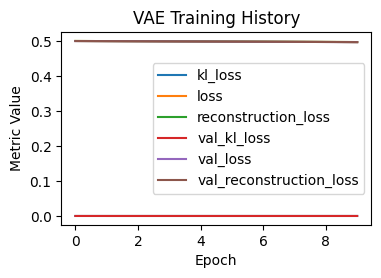

In [ ]:
# prompt: for all keys in vae.history.history, plot their line plots


plt.rcParams['figure.figsize'] = [4, 2.5]
for key in vae.history.history.keys():
    plt.plot(vae.history.history[key], label=key)
plt.title('VAE Training History')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

In [ ]:
umap_df['treatment'].shape

(856,)

In [ ]:
#latent space encoding plot
from sklearn.manifold import TSNE
z_mean_basal, z_log_var_basal, z_basal = vae.encoder(basal_tensor)
z_mean_pert, z_log_var_pert, z_pert = vae.encoder(perturbed_tensor)

z_mean_all = np.vstack([z_mean_basal, z_mean_pert])

# Use t-SNE to reduce to 2D
tsne = TSNE(n_components=2, random_state=42)
z_2d = tsne.fit_transform(z_mean_all)


In [ ]:
umap_embedding_vae = reducer.fit_transform(z_mean_all)

umap_df_vae = pd.DataFrame(data = umap_embedding_vae,
                       columns = ['UMAP_1', 'UMAP_2'])


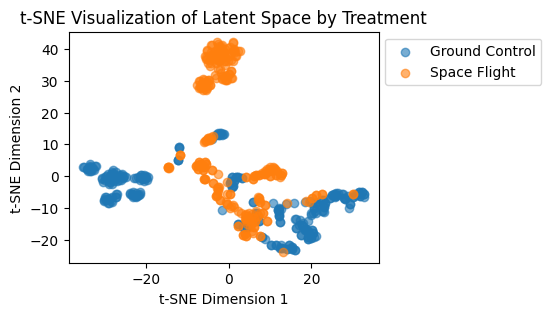

In [ ]:
# Plot the results for treatments
labels = np.array(focMeta['Factor Value [Ionizing Radiation]'].iloc[basal_indices[:min_samples]].tolist() + focMeta['Factor Value [Ionizing Radiation]'].iloc[perturbed_indices[:min_samples]].tolist())
plt.figure(figsize=(4,3))
for label in np.unique(labels):
    plt.scatter(z_2d[labels == label, 0], z_2d[labels == label, 1], label=label, alpha=0.6)

plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.title('t-SNE Visualization of Latent Space by Treatment')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
focMeta.head(2)

,Sample Name,Study Name,Characteristics [Organism],Characteristics [Material Type],Factor Value [Sex],Factor Value [Ionizing Radiation]
0,10,OSD-719-10,Mus musculus,Blood,FeMale,mixed radiation field
1,11,OSD-719-11,Mus musculus,Blood,FeMale,mixed radiation field


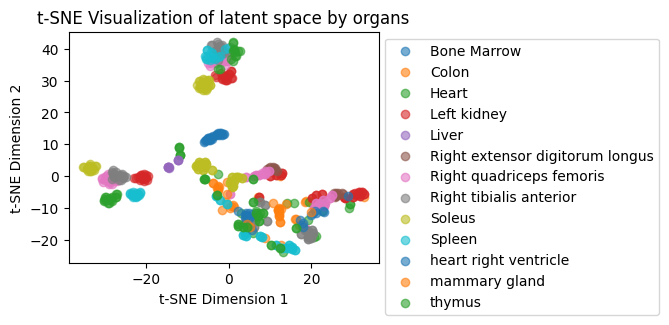

In [ ]:
# Plot the results for treatments
labels = np.array(focMeta['Characteristics [Material Type]'].iloc[basal_indices[:min_samples]].tolist() + focMeta['Characteristics [Material Type]'].iloc[perturbed_indices[:min_samples]].tolist())
plt.figure(figsize=(4,3))
for label in np.unique(labels):
    plt.scatter(z_2d[labels == label, 0], z_2d[labels == label, 1], label=label, alpha=0.6)

plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.title('t-SNE Visualization of latent space by organs')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

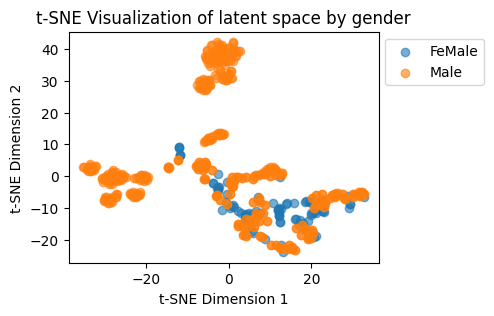

In [ ]:
# Plot the results for treatments
labels = np.array(focMeta['Factor Value [Sex]'].iloc[basal_indices[:min_samples]].tolist() + focMeta['Factor Value [Sex]'].iloc[perturbed_indices[:min_samples]].tolist())
plt.figure(figsize=(4,3))
for label in np.unique(labels):
    plt.scatter(z_2d[labels == label, 0], z_2d[labels == label, 1], label=label, alpha=0.6)

plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.title('t-SNE Visualization of latent space by gender')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

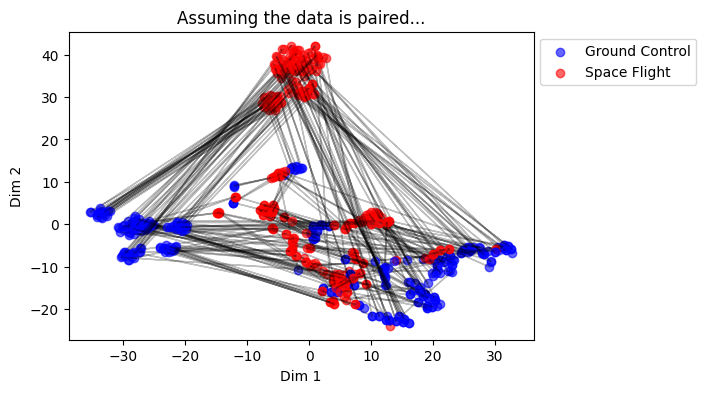

In [ ]:
# Plot the results for treatments
labels = np.array(focMeta['Factor Value [Ionizing Radiation]'].iloc[basal_indices[:min_samples]].tolist() + focMeta['Factor Value [Ionizing Radiation]'].iloc[perturbed_indices[:min_samples]].tolist())
plt.figure(figsize=(6,4))

# Separate basal and perturbed t-SNE coordinates
z_2d_basal = z_2d[labels == 'Ground Control']
z_2d_perturbed = z_2d[labels == 'Space Flight']

# Ensure both arrays have the same number of samples after filtering
min_samples_filtered = min(z_2d_basal.shape[0], z_2d_perturbed.shape[0])
z_2d_basal = z_2d_basal[:min_samples_filtered]
z_2d_perturbed = z_2d_perturbed[:min_samples_filtered]


# Plot points and draw arrows
for i in range(min_samples_filtered):
    basal_point = z_2d_basal[i]
    perturbed_point = z_2d_perturbed[i]

    # Plot basal and perturbed points (optional, can remove if just want arrows)
    plt.scatter(basal_point[0], basal_point[1], color='blue', alpha=0.6, label='Ground Control' if i == 0 else "")
    plt.scatter(perturbed_point[0], perturbed_point[1], color='red', alpha=0.6, label='Space Flight' if i == 0 else "")

    # Draw arrow from basal to perturbed
    plt.arrow(basal_point[0], basal_point[1],
              perturbed_point[0] - basal_point[0], perturbed_point[1] - basal_point[1],
              head_width=0.25, head_length=0.25, fc='black', ec='black', length_includes_head=True, alpha=0.25)


plt.title('Assuming the data is paired...')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
z_2d[labels == 'Ground Control', 0]

array([  3.2865882 , -34.299725  , -34.30485   ,   3.2859182 ,
         0.68373203, -35.185356  , -35.439957  ,   0.68372977,
         0.5151601 , -33.89195   , -33.491554  ,   0.5155055 ,
         1.739654  , -33.86181   , -33.608948  ,   1.7395384 ,
         1.2282155 , -33.666252  , -34.180225  ,   1.2285738 ,
         2.0939713 , -33.29579   , -33.628403  ,   2.0939138 ,
         0.6848502 , -32.21422   , -32.49959   ,   0.6848167 ,
         0.26225027, -32.565254  , -32.913506  ,   0.26215717,
         0.94493896, -33.724426  , -33.057983  ,   0.9448394 ,
        -4.0572343 ,  -3.1089694 ,  -2.7593558 ,  -2.979719  ,
        -2.3081553 ,  -1.220485  ,  -1.3818456 ,  -1.6370546 ,
        -1.9398415 ,  -2.0798044 ,  -2.3394766 , -12.295781  ,
       -12.290632  , -12.29722   , -12.138244  , -12.162697  ,
       -12.146491  ,  16.337921  ,  16.005089  ,  16.982512  ,
        32.83504   ,  20.036125  ,  19.761745  ,  -1.7925141 ,
        18.469429  ,  12.627929  ,   8.832689  , -28.86

In [ ]:
labels

array(['Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control', 'Ground Control', 'Ground Control',
       'Ground Control',

In [ ]:
basal_sample = basal_tensor[0:1]

In [ ]:
pert_sample = perturbed_tensor[0:1]

In [ ]:
basal_sample.shape

TensorShape([1, 12791])

In [ ]:
z_mean_basal, z_log_var_basal, z_basal = vae.encoder.predict(basal_sample)
sample_delta_pred = vae.delta(z_mean_basal)
sample_z_pert_pred = z_mean_basal + sample_delta_pred
sample_reconstruction = vae.decoder.predict(sample_z_pert_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


In [ ]:
len(basal_sample[0])

12791

In [ ]:
len(sample_reconstruction[0])

12791

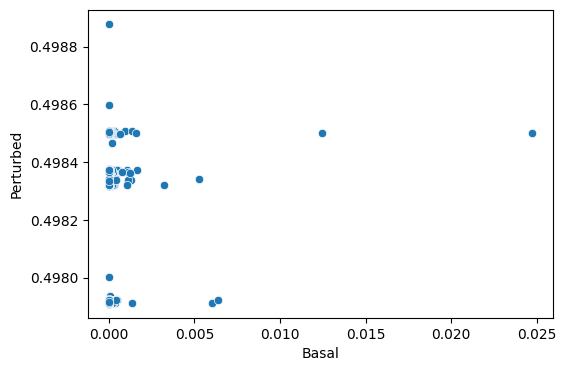

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 4] # Adjust height and width as needed
sns.scatterplot(x=basal_sample[0], y=sample_reconstruction[0][:, 0])
plt.xlabel('Basal')
plt.ylabel('Perturbed')
plt.show()

Text(0, 0.5, 'Perturbed')

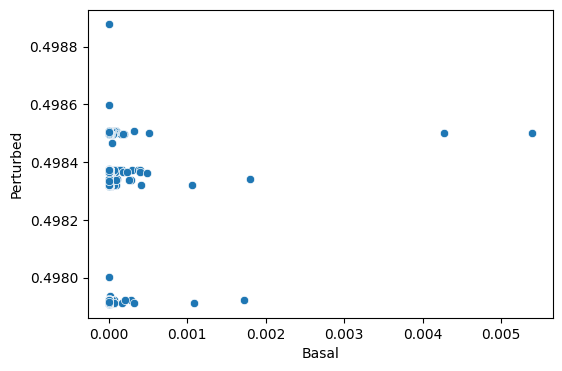

In [ ]:
sns.scatterplot(x=pert_sample[0], y=sample_reconstruction[0][:, 0])
plt.xlabel('Basal')
plt.ylabel('Perturbed')

<Axes: >

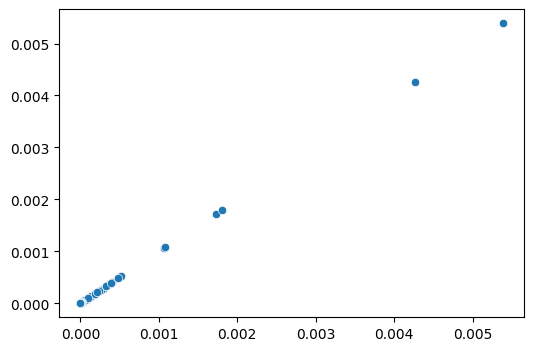

In [ ]:
sns.scatterplot(x=pert_sample[0], y=pert_sample[0])

In [ ]:
basal_tensor[0:1]

<tf.Tensor: shape=(1, 12791), dtype=float32, numpy=
array([[6.0956900e-06, 4.8952626e-07, 1.7136132e-04, ..., 2.4977876e-06,
        1.1543476e-06, 1.2182632e-03]], dtype=float32)>

In [ ]:
perturbed_tensor[0:1]

<tf.Tensor: shape=(1, 12791), dtype=float32, numpy=
array([[2.2657955e-06, 1.3690710e-07, 4.3460339e-05, ..., 4.4708810e-07,
        3.1590460e-07, 4.8443739e-04]], dtype=float32)>

Text(0, 0.5, 'Perturbed')

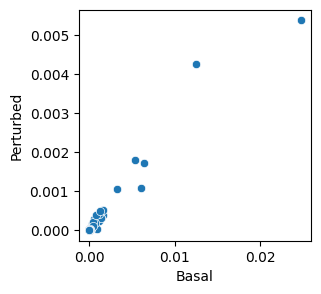

In [ ]:
plt.rcParams['figure.figsize'] = [3,3] # Adjust height and width as needed
sns.scatterplot(x=basal_tensor[0:1][0], y=perturbed_tensor[0:1][0])
plt.xlabel('Basal')
plt.ylabel('Perturbed')